In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
# create lambda function that affects to each numerical value a labeled value of the target_names list
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [21]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

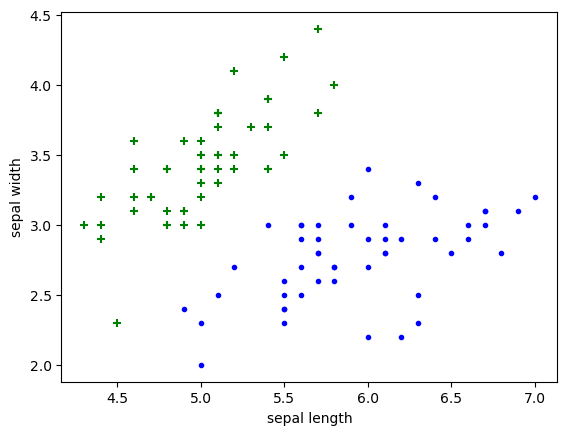

In [22]:
import matplotlib.pyplot as plt
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color="green",marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color="blue",marker='.')

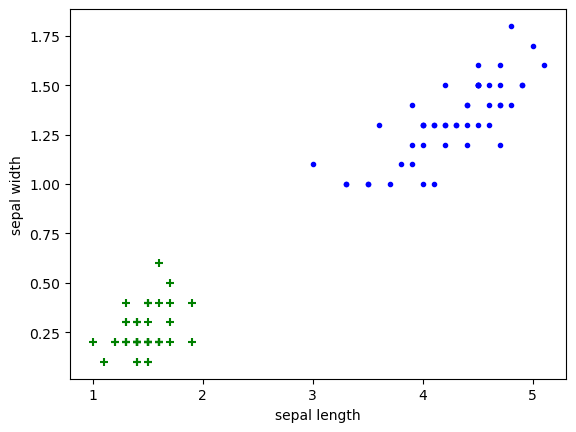

In [24]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color="green",marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color="blue",marker='.')

In [25]:
# we are going to split our dataset into train and test exemples
from sklearn.model_selection import train_test_split

In [28]:
Y = df.target
X = df.drop(['target','flower_name'],axis='columns')
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [33]:
# import the model SVM
from sklearn.svm import SVC
model =SVC()

In [ ]:
# explication of main parameters of the model 
# SVC : 
#    - C : controls maximizing the margin between support vectors and minimizing classification error
#    - kernel : function that specifies the type of decision boundary ysed by SVM that can be : linear , poly , sigmoid ..
#    - degree : this parameter is used when the kernel is "poly" to specifiy the degree 

In [34]:
model.fit(X_train,Y_train)

SVC()

In [35]:
# performance of our model
model.score(X_test,Y_test)

1.0

In [38]:
y_predicted=model.predict(X_test)
y_predicted

array([1, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0, 2, 2, 1,
       2, 1, 1, 1, 0, 1, 1, 0])

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_predicted)
cm

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

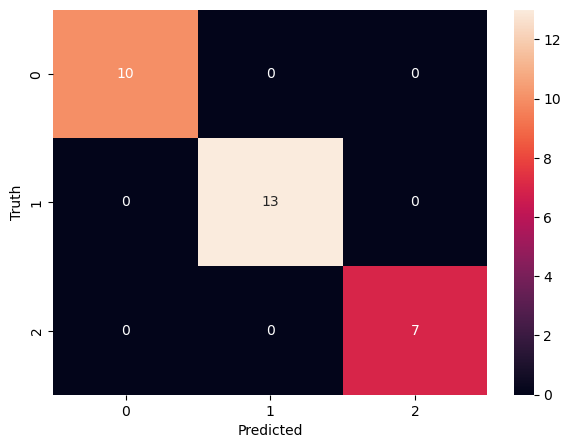

In [41]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# we can distinguish that model's predicitons align with actual test values